In [17]:
import pandas as pd
import numpy as np


In [18]:
df = pd.read_csv("car_prices.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,1


In [20]:
df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
diesel               0
gas                  0
dtype: int64

In [21]:
# stroke has 4 null values, therefore clean by getting the mean:

df['stroke'].fillna(df['stroke'].mean(), inplace=True)

In [22]:
# Recheck if null values have been solved 

df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
diesel               0
gas                  0
dtype: int64

In [23]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas
count,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,0.099502,0.900498
std,58.167861,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,0.300083,0.300083
min,0.000000,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000
25%,50.000000,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000
50%,100.000000,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,0.000000,1.000000
75%,150.000000,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000
max,200.000000,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000


In [24]:
#Normalizing data: Important to keep ranges in some values consistent.


# 1. Simple Feature Scaling: Xnew=Xold/Xmax  -   Output ranges between 0 and 1
df['length']= df['length']/df["length"].max()


# 2. Min-Max: Xnew=(Xold-Xmin)/(Xmax-Xmin) - Output ranges between 0 and 1
df['width']=(df['width']-df['width'].min())/(df['width'].max()-df['width'].min())


# 3. Z-score: Xnew=(Xold-Average)/std  - Output ranges between -3 and 3
df['height']=(df["height"]-df["height"].mean())/df["height"].std()



In [25]:
normalized_length = df['length']
normalized_length.head()

0    0.811148
1    0.811148
2    0.822681
3    0.848630
4    0.848630
Name: length, dtype: float64

In [26]:
normalized_width = df['width']
normalized_width.head()

0    0.324786
1    0.324786
2    0.444444
3    0.504274
4    0.521368
Name: width, dtype: float64

In [27]:
normalized_height = df['height']
normalized_height

0     -2.029015
1     -2.029015
2     -0.558319
3      0.217881
4      0.217881
         ...   
196    0.708112
197    0.708112
198    0.708112
199    0.708112
200    0.708112
Name: height, Length: 201, dtype: float64

In [28]:
## Binning

# i- Binning = Grouping things into bins eg age:[0 to 5][6 to 10] etc.

# ii- Converts Numeric to Categorical variables

# iii- Group a set of numerical values into a set of bins

#      Using binning, we categorize the price into three bins: low price, medium price, and high eg (range 5000 to 44500)
#      5000,10000,12000      30000,31000      39000,44000,44500
#           LOW              MEDIUM                  HIGH


#Example:


bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

group_names= ['Low', 'Medium', 'High']



df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

df[['horsepower','horsepower-binned']].head(20)


,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


In [29]:
df['price-range'] = pd.cut(df.price, bins=[0,17000,20000,30000],
                           labels=['5000-20000','20000-35000','35000-45000'])


In [30]:
# 2. Exploratory data analysis(EDA)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
drive_wheels_counts=df["drive-wheels"].value_counts().to_frame()

drive_wheels_counts


,drive-wheels
fwd,118
rwd,75
4wd,8


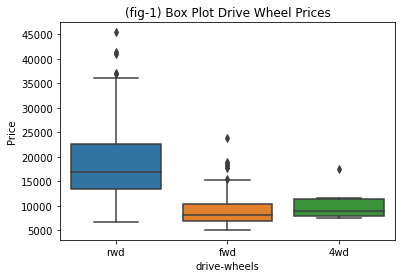

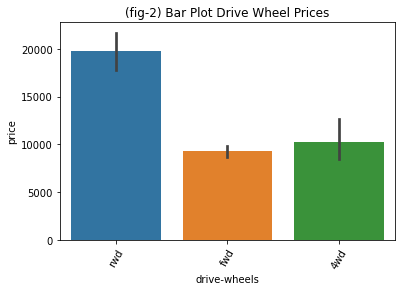

In [32]:
### BOX PLOT makes it easy to compare between categorical values

sns.boxplot(x= "drive-wheels", y= 'price', data=df)
plt.title("(fig-1) Box Plot Drive Wheel Prices")
plt.ylabel("Price")
plt.show()




plt.title("(fig-2) Bar Plot Drive Wheel Prices")
plt.ylabel("Price")
sns.barplot(x=df["drive-wheels"], y=df['price'])
plt.xticks(rotation=60)
plt.show()

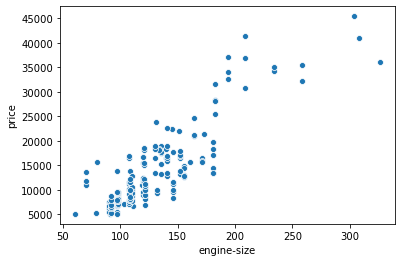

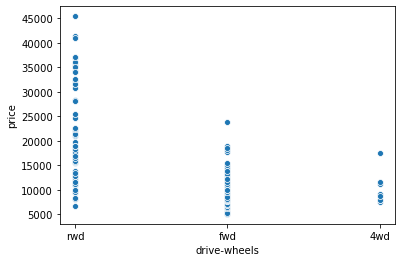

In [33]:
### Visual relation between two variables


#Scatter Plot

sns.scatterplot(x="engine-size",y="price",data=df)
plt.show()

# The plot below, shows that as Engine size goes up, so does Price: Thus these two variables have a
# POSITIVE LINEAR RELATIONSHIP
sns.scatterplot(x="drive-wheels",y="price",data=df)
plt.show()


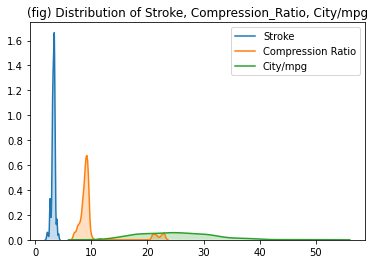

In [34]:
sns.kdeplot(data=df['stroke'], label="Stroke", shade=True)
sns.kdeplot(data=df['compression-ratio'], label="Compression Ratio", shade=True)
sns.kdeplot(data=df['city-mpg'], label="City/mpg", shade=True)
plt.title("(fig) Distribution of Stroke, Compression_Ratio, City/mpg")
plt.show()

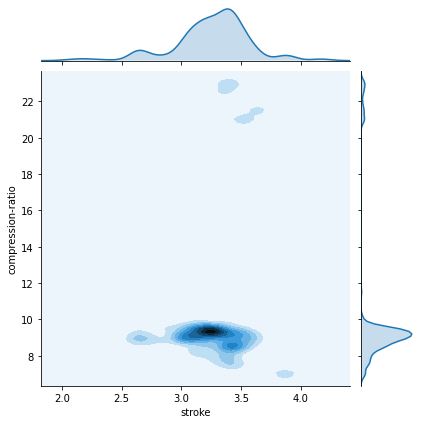

In [35]:
sns.jointplot(x=df["stroke"], y=df["compression-ratio"], kind='kde')
plt.show()

In [36]:
df_test=df[['drive-wheels',"body-style",'price']]

df_grp=df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [37]:
df_pivot=df_grp.pivot(index='drive-wheels', columns='body-style')

In [38]:
df.pivot

<bound method DataFrame.pivot of      Unnamed: 0  Unnamed: 0.1  symboling  normalized-losses         make  \
0             0             0          3                122  alfa-romero   
1             1             1          3                122  alfa-romero   
2             2             2          1                122  alfa-romero   
3             3             3          2                164         audi   
4             4             4          2                164         audi   
..          ...           ...        ...                ...          ...   
196         196           196         -1                 95        volvo   
197         197           197         -1                 95        volvo   
198         198           198         -1                 95        volvo   
199         199           199         -1                 95        volvo   
200         200           200         -1                 95        volvo   

    aspiration num-of-doors   body-style drive-wheels 

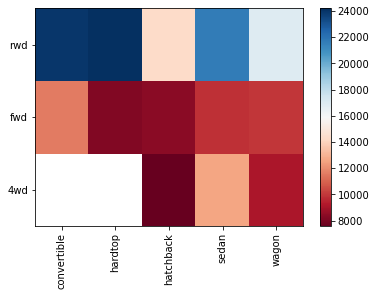

In [39]:
### The easy easy way to plot a TARGET variable over multiple variables is to use heat maps:

fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Correlation

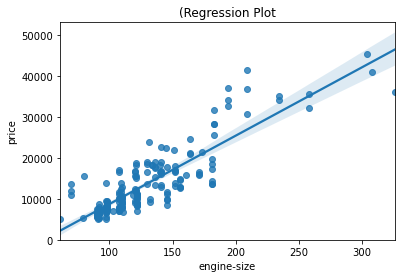

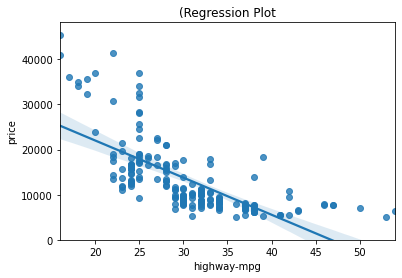

In [40]:
plt.title("(Regression Plot")
sns.regplot(x='engine-size', y='price', data=df) #seaborn regplot
plt.ylim(0)
plt.show()


plt.title("(Regression Plot")
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)
plt.show()

✔Fig-1 shows that the bigger the engine size, the higher the price therefore a POSITIVE CORRELATION BETWEEN THE TWO VARIABLES
✔Fig-2 shows that the higher the Highway/mpg, the higher the lower the price therefore a Negative CORRELATION BETWEEN THE TWO VARIABLES

In [41]:
#pearson_coef, p_value = stats.pearsonr(df2['horsepower'], df2['price'])

In [42]:
df.corr()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas
Unnamed: 0,1.000000,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162565,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214,0.121454,-0.121454
Unnamed: 0.1,1.000000,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162565,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214,0.121454,-0.121454
symboling,-0.162764,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.007992,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,-0.196735,0.196735
normalized-losses,-0.241092,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055127,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,-0.101546,0.101546
wheel-base,0.125517,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.157964,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.307237,-0.307237
length,0.161848,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123913,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.211187,-0.211187
width,0.043976,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188814,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.244356,-0.244356
height,0.252015,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060822,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.281578,-0.281578
curb-weight,0.064820,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167412,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.221046,-0.221046
engine-size,-0.047764,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205806,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.070779,-0.070779


In [43]:
df.rename({"Unnamed: 0.1":"a"}, axis="columns", inplace=True) # Renamed and dropped the unnamed column.
df.drop(["a"], axis=1, inplace=True)

In [44]:
df.head(2)

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,horsepower-binned,price-range
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,0,1,Low,5000-20000
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,0,1,Low,5000-20000


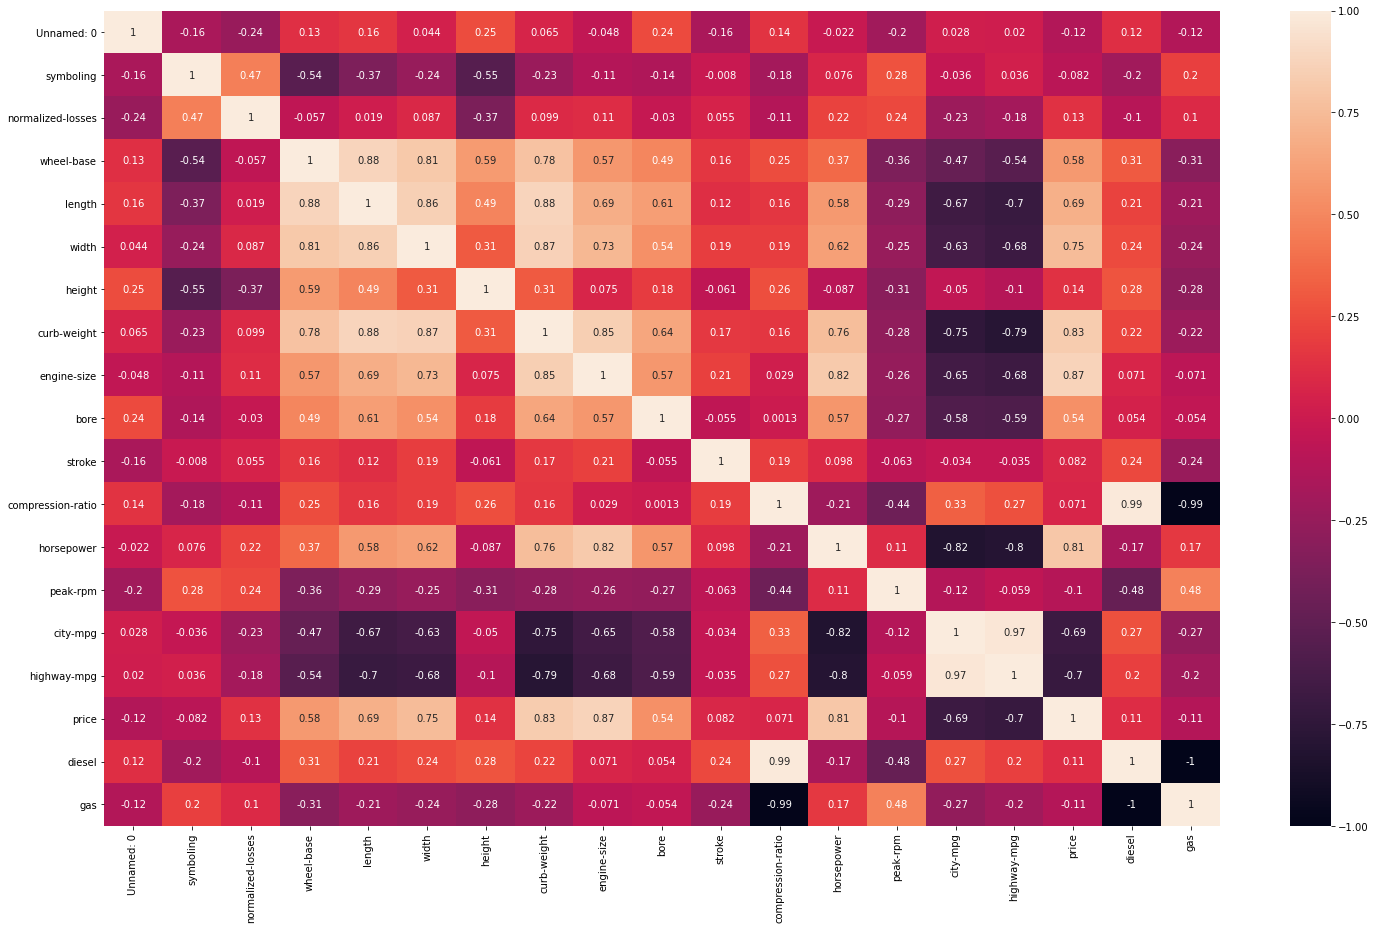

In [45]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot = True) 
plt.show()   

In [46]:
# Statistical comparison of groups using ANOVA

from scipy import stats


df_anova=df[['make','price']]
grouped_anova=df_anova.groupby(["make"])


In [47]:
f_val, p_val = stats.f_oneway(grouped_anova.get_group('volvo')['price'], grouped_anova.get_group('subaru')['price'])

In [48]:
f_val, p_val

(72.23423745304088, 3.0796309522583736e-08)

# Model Choices:

### a) Linear Regression

In [49]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale


In [50]:
lm=LinearRegression() 

In [51]:
x=df[['highway-mpg']] #Predictor x
y=df[['price']] # Target y

In [52]:
### FIT the MODEL

lm.fit(x,y)

LinearRegression()

In [53]:
Yhat=lm.predict(x)
Yhat[0:10] # number of samples

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508],
       [17879.97140011],
       [17879.97140011],
       [17879.97140011],
       [21988.63829172],
       [14593.03788682]])

In [54]:
lm.intercept_

array([38423.30585816])

In [55]:
lm.coef_

array([[-821.73337832]])

In [56]:
### Therefore, using the SLR formula y=b0+b1x, use INTERCEPT and SLOPE


### PRICE = 38423.31 - 821.73 * Highway-mpg (which is x)

38423 - 821 * 20

22003

# Model Choices:

### b) Multiple Linear Regression

In [139]:
z=df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]


In [140]:
# 2) Then train the model with the fit method

lm.fit(z, df['price'])

LinearRegression()

In [141]:
Yhat=lm.predict(z)

In [145]:
Yhat[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [121]:
lm.intercept_

-15806.624626329234

In [122]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [ ]:
# 6) The ESTIMATED LINEAR MODEL IS: Y = b0 + b1x1 b2x2 + b3x3 + b4x4

# PRICE = -15806.62 + (53.50)*horsepower + (4.70)*curb-weight + (81.53)*engine-size + 36.06*highway-mpg


# Model Validation Using
## Visualization


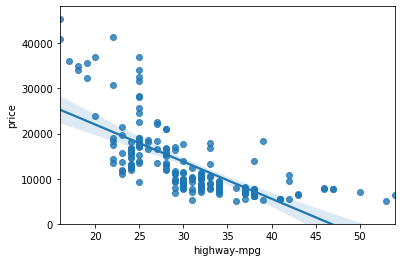

In [127]:
sns.regplot(x='highway-mpg', y='price', data=df) #imported seaborn above
plt.ylim(0,)
plt.show()


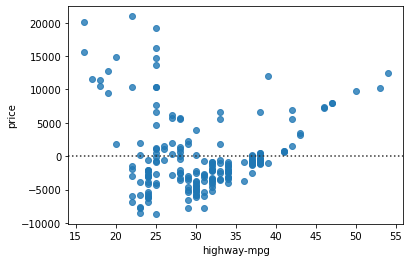

In [146]:
### The RESIDUAL PLOT represents the error between the actual value and the predicted value


sns.residplot(df['highway-mpg'], df['price'])
plt.show()

# The RESIDUAL PLOT below shows that the residuals have a curvature therefore not a correct Linear model 
# A correct Linear models should have residuals scattered around the line


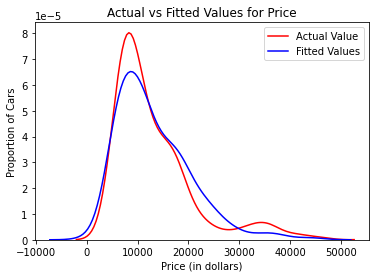

In [148]:
### A DISTRIBUTION PLOT counts the predicted value versus the actual value
# Extremely useful for visualizing (MLR) ie with more than 1 independent variable or feature
 
    

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value") #First Plot
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)  # Second Plot(Fitted = Result of the model)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close() # Closes figure (more research)

## For the first plot: df['price'] refers to ACTUAL values
#  hist=False   because it is a DISTRIBUTION PLOT and not a histogram 

## For the second plot: Yhat refers to the PREDICTED VALUES
#  hist=False   because it is a DISTRIBUTION PLOT and not a histogram 
       


In [ ]:
# The FITTED values are reasonably close to the ACTUAL values, since the two distributions overlap a bit.